## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [19]:
# Import packages
# Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import data preprocessing and modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor 
#from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#performance metrics 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
#split the target varible
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
#spliting independent variables
X=df.drop(['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### Create Pipeline

In [10]:
# Create Column Transformer with 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#separate num and cat features
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

#instantiate the scaler and encoder
numeric_transformer=StandardScaler()
onehot_transformer=OneHotEncoder()

#instantiate the preprocessor

preprocessor= ColumnTransformer(
    [
        ('OneHotEncoder',onehot_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
#make train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBoost Regressor':XGBRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor()
}

#maintain list of model names to append
model_list = []
#maintain list of performance metrics scores to append
r2_list =[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) #fit the model

    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #performance metrics
    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mse, model_test_rmse, model_test_r2=evaluate_model(y_test,y_test_pred)

    #print the results
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training Set')
    print('-Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('-Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('-R2 Score: {:.4f}'.format(model_train_r2))

    print('--------------------------------------------')

    print('Model Performance for Testing Set')
    print('-Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('-Mean Absolute Error: {:.4f}'.format(model_test_mse))
    print('-R2 Score: {:.4f}'.format(model_test_r2))
    #capture R2 for test data in list
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')
    

Linear Regression
Model Performance for Training Set
-Root Mean Squared Error: 5.3231
-Mean Absolute Error: 4.2667
-R2 Score: 0.8743
--------------------------------------------
Model Performance for Testing Set
-Root Mean Squared Error: 5.3940
-Mean Absolute Error: 4.2148
-R2 Score: 0.8804


Lasso
Model Performance for Training Set
-Root Mean Squared Error: 6.5938
-Mean Absolute Error: 5.2063
-R2 Score: 0.8071
--------------------------------------------
Model Performance for Testing Set
-Root Mean Squared Error: 6.5197
-Mean Absolute Error: 5.1579
-R2 Score: 0.8253


Ridge
Model Performance for Training Set
-Root Mean Squared Error: 5.3233
-Mean Absolute Error: 4.2650
-R2 Score: 0.8743
--------------------------------------------
Model Performance for Testing Set
-Root Mean Squared Error: 5.3904
-Mean Absolute Error: 4.2111
-R2 Score: 0.8806


K-Neighbors Regressor
Model Performance for Training Set
-Root Mean Squared Error: 5.7077
-Mean Absolute Error: 4.5167
-R2 Score: 0.8555
-----

### Results

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)),\
              columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,Gradient Boosting Regressor,0.872412
5,Random Forest Regressor,0.852107
8,AdaBoost Regressor,0.845051
6,XGBoost Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.724540


## Linear Regression

In [22]:
#Ridge performed the best in terms of R2
#instantiate the model 
ridge_model=Ridge(fit_intercept=True)
#fit the model 
ridge_model=ridge_model.fit(X_train,y_train)
#make predictions
y_pred=ridge_model.predict(X_test)
#performance
score=r2_score(y_test,y_pred)
print('Accuracy of the model is %.4f'%score)

Accuracy of the model is 0.8806


## Plot y_pred and y_test

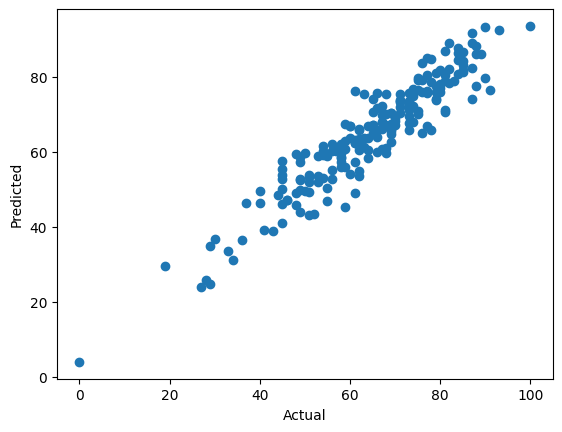

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

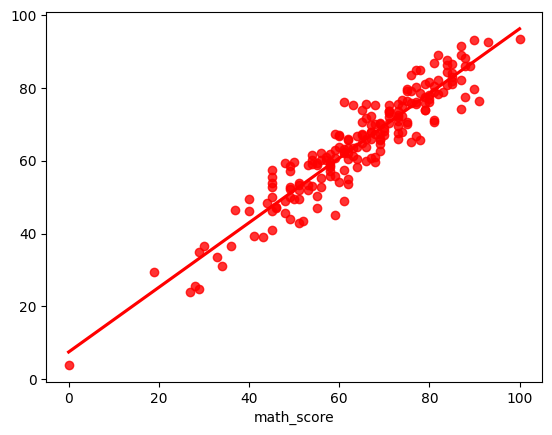

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [26]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
